# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import os
import nltk
import tensorflow as tf
from keras.layers import *
from tensorflow import *
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import *
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import warnings
from collections import Counter
from utils.textnormalization import TextNormalization
from utils.machinelearning import machine_learning_model, fit_model
from utils.deeplearning import model_compile, model_fit, lstm_, gru_, bidirectional_lstm
from utils.plot_model_changes import plot_changes
from utils.sentimentinformation import sentiment_percentage, sentiment_counts
from utils.wordcloud import wordcloud
from utils.most_frequent_word_plot import bar_plot
from utils.deeplearning_preprcosesing import  deeplearning_preprcosesing_
from utils.word_2_vec import word_2_vec_
from utils.confusion_matrix import confusion_matrix_, confusion_matrix_display
from utils.generate_poitive_negative import false_true_positive, false_true_negative
from utils.performance_metrics import accuracy_score, precision_score, sensitivity_score, specificity_score, f1_score, error_rate, performance_metrics_data_frame
pd.options.display.max_rows = 100
pd.options.display.max_columns =None 
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

# Download Some Packages

In [2]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Ignore Warnings

In [3]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings(action='ignore')

# Read Data

In [4]:
Train_data = pd.read_csv('train_data (1).csv')
Train_data.rename(columns = {'0': 'Review', '1': 'Sentiment'}, inplace = True)
Train_data['Sentiment'] = Train_data['Sentiment'].map({ 0 : 'Negative', 1 : 'Positive'})
Train_data.tail()

Review Sentiment
24995  With this movie being the only Dirty Harry mov...  Positive
24996  Any screen adaptation of a John Grisham story ...  Positive
24997  This film captured my heart from the very begi...  Positive
24998  A deplorable social condition triggers off the...  Positive
24999  Always enjoy the great acting of Drew Barrymor...  Positive

In [5]:
Test_data = pd.read_csv('test_data (1).csv')
Test_data.rename(columns = {'0': 'Review', '1': 'Sentiment'}, inplace = True)
Test_data['Sentiment'] = Test_data['Sentiment'].map({ 0 : 'Negative', 1 : 'Positive'})
Test_data.tail()

Review Sentiment
24995  Great just great! The West Coast got "Dirty" H...  Positive
24996  This movie has all the qualities to be good, S...  Positive
24997  Personally, I think Kevin Spacey is one of the...  Positive
24998  I'm not sure as to call this movie a children'...  Positive
24999  Good to see I'm not the only person who rememb...  Positive

In [6]:
Data = pd.read_csv('EnglishData.csv') # This Data Will Be Use For Word2Vec

# Sentiment Information

**1-Train Data**

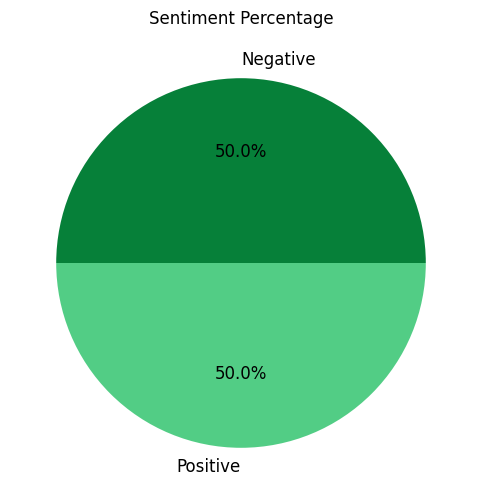

In [7]:
sentiment_percentage(Train_data, 'Sentiment', (6, 6))

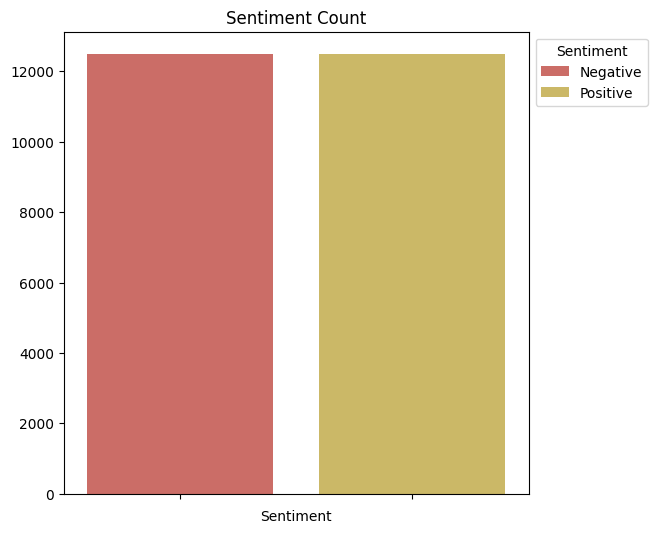

In [8]:
sentiment_counts(Train_data, 'Sentiment', (6, 6))

**2-Test Data**

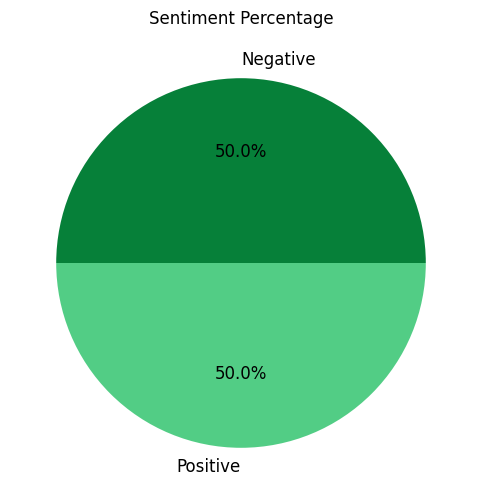

In [9]:
sentiment_percentage(Test_data, 'Sentiment', (6, 6))

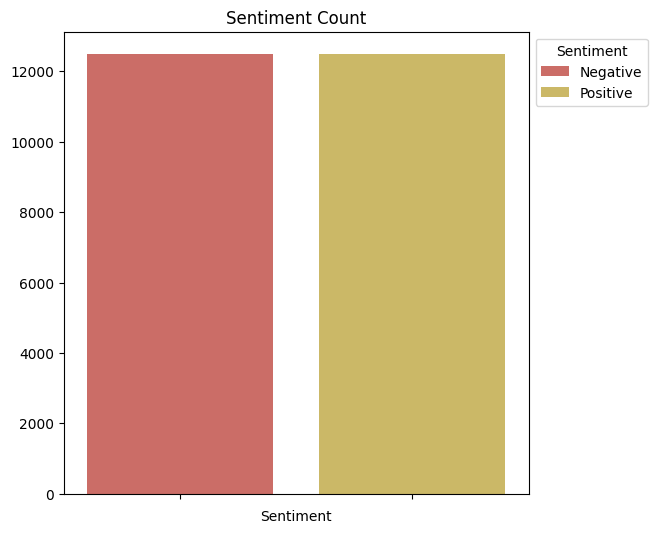

In [10]:
sentiment_counts(Test_data, 'Sentiment', (6, 6))

# Number Of Sentences

**1-Train Data**

In [11]:
Train_data['NumberOfSentences'] = Train_data['Review'].apply(lambda n:len(sent_tokenize(n)))
Train_data.drop(Train_data[Train_data["NumberOfSentences"] == 0].index, inplace = True)
Train_data['NumberOfSentences'].sum()

271057

**2-Test Data**

In [12]:
Test_data['NumberOfSentences'] = Test_data['Review'].apply(lambda n:len(sent_tokenize(n)))
Test_data.drop(Test_data[Test_data["NumberOfSentences"] == 0].index, inplace = True)
Test_data['NumberOfSentences'].sum()

266015

# Average Number Of Sentences

**1-Train Data**

In [13]:
AverageNumberOfSentence_Train_data = int(np.round(Train_data["NumberOfSentences"].mean()))
AverageNumberOfSentence_Train_data

11

**2-Test Data**

In [14]:
AverageNumberOfSentence_Test_data = int(np.round(Test_data["NumberOfSentences"].mean()))
AverageNumberOfSentence_Test_data

11

# Maximum Number Of Sentences

**1-Train Data**

In [15]:
MaximumNumberOfSentence_Train_data = Train_data["NumberOfSentences"].max()
MaximumNumberOfSentence_Train_data

282

**2-Data Set**

In [16]:
MaximumNumberOfSentence_Test_data = Test_data["NumberOfSentences"].max()
MaximumNumberOfSentence_Test_data

84

# Minimum Number Of Sentences

**1-Train Data**

In [17]:
MinimumNumberOfSentence_Train_data = Train_data["NumberOfSentences"].min()
MinimumNumberOfSentence_Train_data

1

**2-Test Data**

In [18]:
MinimumNumberOfSentence_Test_data = Test_data["NumberOfSentences"].min()
MinimumNumberOfSentence_Test_data

1

# Number Of Words Before Text Normalization

**1-Train Data**

In [19]:
Train_data["Number of Words 1"] = Train_data["Review"].apply(lambda n:len(word_tokenize(n)))
Train_data["Number of Words 1"].sum()

7065338

**2-Test Data**

In [20]:
Test_data["Number of Words 1"] = Test_data["Review"].apply(lambda n:len(word_tokenize(n)))
Test_data["Number of Words 1"].sum()

6908836

# Average Number Of Words Before Text Normalization

**1-Train Data**

In [21]:
AverageNaumberOfWords1_Train_data = int(np.round((Train_data["Number of Words 1"].mean())))
AverageNaumberOfWords1_Train_data

283

**2-Test Data**

In [22]:
AverageNaumberOfWords1_Test_data = int(np.round((Test_data["Number of Words 1"].mean())))
AverageNaumberOfWords1_Test_data

276

# Maximum Number Of Word Before Text Normalization

**1-Train Data**

In [23]:
MaximumNaumberOfWords1_Train_data = Train_data["Number of Words 1"].max()
MaximumNaumberOfWords1_Train_data

2818

**2-Test Data**

In [24]:
MaximumNaumberOfWords1_Test_data = Test_data["Number of Words 1"].max()
MaximumNaumberOfWords1_Test_data

2911

# Minimum Number Of Words Before Text Normalization

**1-Train Data**

In [25]:
MimimumNaumberOfWords1_Train_Data = Train_data["Number of Words 1"].min()
MimimumNaumberOfWords1_Train_Data

11

**2-Test Data**

In [26]:
MimimumNaumberOfWords1_Test_data = Test_data["Number of Words 1"].min()
MimimumNaumberOfWords1_Test_data

8

# Number Of Charachters Before Text Normalization

**1-Train Data**

In [27]:
Train_data["Number of Charachters 1"] = Train_data["Review"].str.len()
Train_data["Number of Charachters 1"].sum()

33126741

**2-Test Data**

In [28]:
Test_data["Number of Charachters 1"] = Test_data["Review"].str.len()
Test_data["Number of Charachters 1"].sum()

32344810

# Average Number Of Charachters Before Text Normalization

**1-Train Data**

In [29]:
AverageNumberOfCharachters1_Train_data = int(np.round(Train_data["Number of Charachters 1"].mean()))
AverageNumberOfCharachters1_Train_data

1325

**2-Test Data**

In [30]:
AverageNumberOfCharachters1_Test_data = int(np.round(Test_data["Number of Charachters 1"].mean()))
AverageNumberOfCharachters1_Test_data

1294

# Maximum Number Of Charachters Before Text Normalization

**1-Train Data**

In [31]:
MaximumNumberOfCharachters1_Train_data = Train_data['Number of Charachters 1'].max() 
MaximumNumberOfCharachters1_Train_data

13704

**2-Test Data**

In [32]:
MaximumNumberOfCharachters1_Test_data = Test_data['Number of Charachters 1'].max() 
MaximumNumberOfCharachters1_Test_data

12988

# Minimum Number Of Charachters Before Text Normalization

**1-Train Data**

In [33]:
MinimumNumberOfCharachters1_Train_data = Train_data['Number of Charachters 1'].min() 
MinimumNumberOfCharachters1_Train_data

52

**2-Data Set**

In [34]:
MinimumNumberOfCharachters1_Test_data = Test_data['Number of Charachters 1'].min() 
MinimumNumberOfCharachters1_Test_data

32

# Most Frequent Words Before Text Normalization

**1-Train Data**

In [35]:
MostFrequentWord1_Train_data = Counter((Train_data['Review']).str.split().explode()).most_common(15)
MostFrequentWordDF1_Train_data = pd.DataFrame(MostFrequentWord1_Train_data, columns=('Word', 'Count'), index=range(1, 16))
MostFrequentWordDF1_Train_data

Word   Count
1     the  287032
2       a  155096
3     and  152664
4      of  142972
5      to  132568
6      is  103229
7      in   85580
8       I   65973
9    that   64560
10   this   57199
11     it   54439
12  /><br   50935
13    was   46698
14     as   42510
15   with   41721

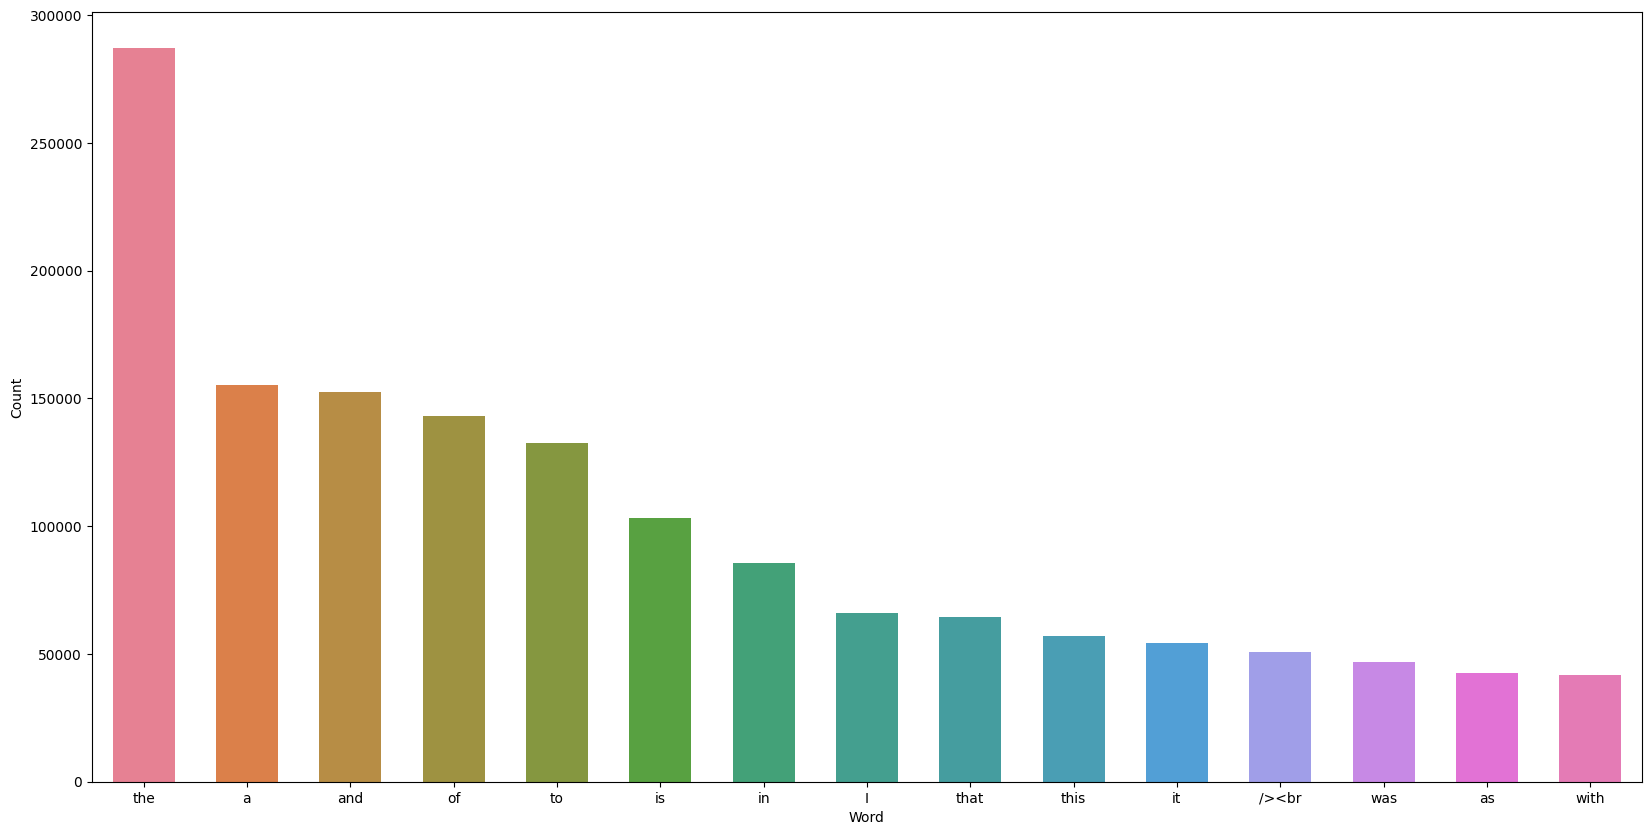

In [36]:
bar_plot(data=MostFrequentWordDF1_Train_data,  x = 'Word', y='Count')

**2-Test Data**

In [37]:
MostFrequentWord1_Test_data = Counter((Test_data['Review']).str.split().explode()).most_common(15)
MostFrequentWordDF1_Test_data = pd.DataFrame(MostFrequentWord1_Test_data, columns=('Word', 'Count'), index=range(1, 16))
MostFrequentWordDF1_Test_data

Word   Count
1     the  281703
2       a  151864
3     and  149255
4      of  140653
5      to  129282
6      is   99827
7      in   84401
8       I   66525
9    that   62258
10   this   56527
11     it   53477
12  /><br   50039
13    was   45960
14   with   40848
15     as   40620

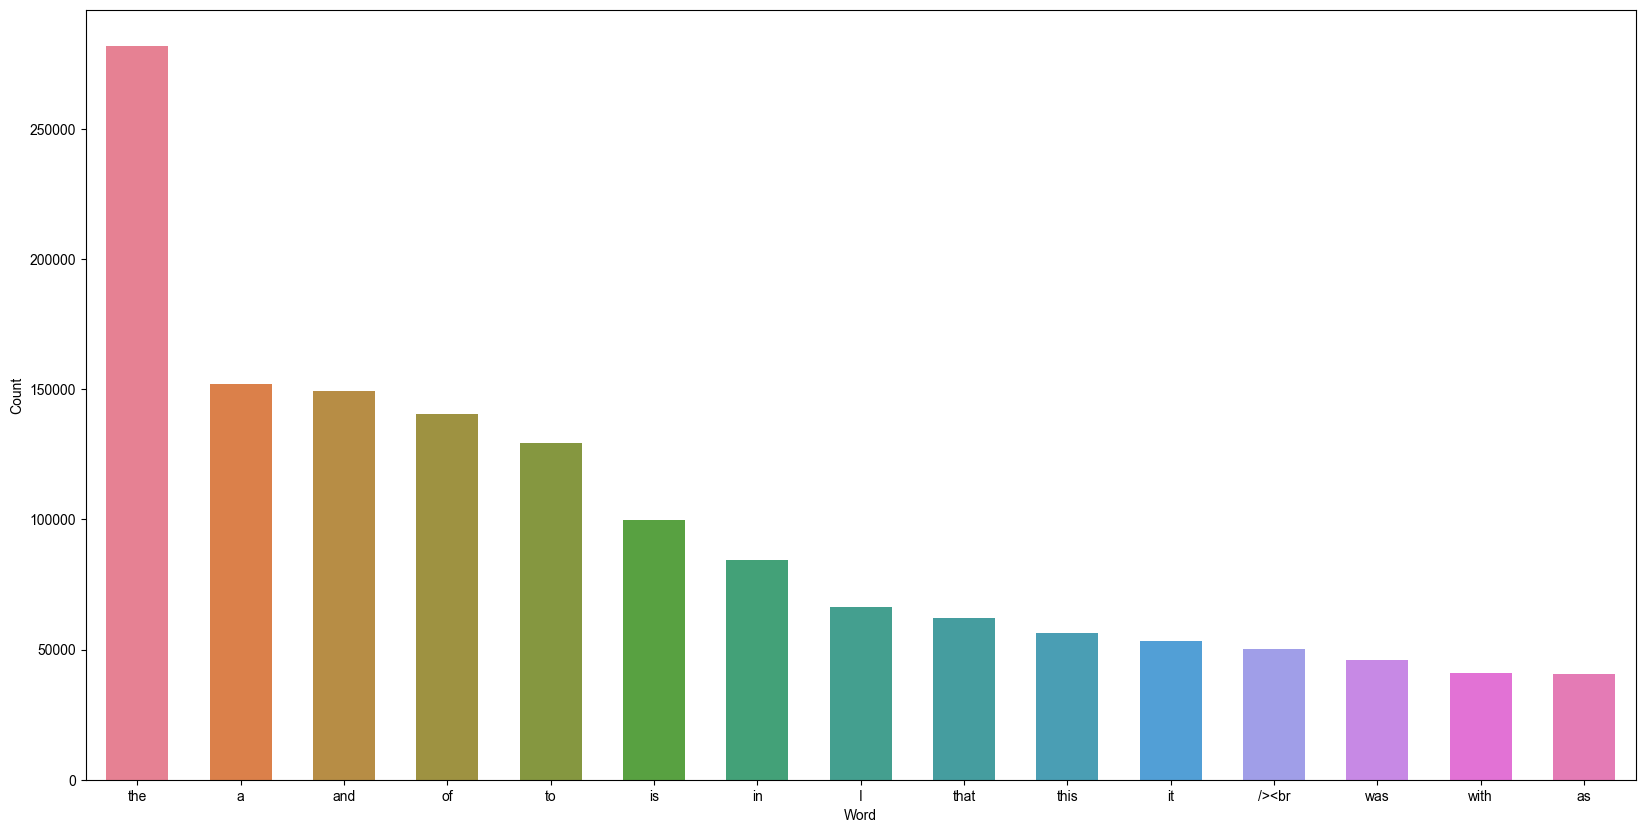

In [38]:
bar_plot(data=MostFrequentWordDF1_Test_data,  x = 'Word', y='Count')

# Text Normalization

In [39]:
text_normalization = TextNormalization(string_lower = True,
                                       remove_emojis = True,
                                       remove_hashtags = True,
                                       remove_emails = True,
                                       remove_URLs = True,
                                       remove_mentions = True,
                                       remove_html_tags = True,
                                       remove_new_line_char = True,           
                                       remove_duplicate_char = True,
                                       remove_duplicate_word = True,
                                       english_spell_coreccter = False,
                                       expand_contractions = True,
                                       remove_stop_words = True,
                                       remove_special_character = True,
                                       remove_puncuations = True,
                                       remove_single_char = True,
                                       remove_numbers = True,
                                       remove_non_english = True,
                                       remove_meaningless_word = True,
                                       remove_longest_than = True,
                                       remove_whitespace = True,
                                       lemmatize = True,
                                       stemmer = False)

**1-Train Data**

In [40]:
Train_data['Normalized_Review'] = Train_data['Review'].apply(text_normalization.normalization)
Train_data.dropna(axis=1, inplace=True)
Train_data.tail(5)

Review Sentiment  \
24995  With this movie being the only Dirty Harry mov...  Positive   
24996  Any screen adaptation of a John Grisham story ...  Positive   
24997  This film captured my heart from the very begi...  Positive   
24998  A deplorable social condition triggers off the...  Positive   
24999  Always enjoy the great acting of Drew Barrymor...  Positive   

       NumberOfSentences  Number of Words 1  Number of Charachters 1  \
24995                 10                244                     1106   
24996                  7                272                     1288   
24997                 11                255                     1189   
24998                 15                526                     2624   
24999                  6                161                      758   

                                       Normalized_Review  
24995  movie dirty harry movie clint well know say en...  
24996  screen adaptation story approach last director...  
24997  film heart beginning hearing first seeing wond...  
24998  deplorable social condition catastrophe ended ...  
24999  enjoy great acting drew great performance film...

**2-Test Data**

In [41]:
Test_data['Normalized_Review'] = Test_data['Review'].apply(text_normalization.normalization)
Test_data.dropna(axis=1, inplace=True)
Test_data.tail(5)

Review Sentiment  \
24995  Great just great! The West Coast got "Dirty" H...  Positive   
24996  This movie has all the qualities to be good, S...  Positive   
24997  Personally, I think Kevin Spacey is one of the...  Positive   
24998  I'm not sure as to call this movie a children'...  Positive   
24999  Good to see I'm not the only person who rememb...  Positive   

       NumberOfSentences  Number of Words 1  Number of Charachters 1  \
24995                 16                245                     1090   
24996                  3                 67                      282   
24997                 13                189                      870   
24998                  5                346                     1512   
24999                  6                154                      695   

                                       Normalized_Review  
24995  great great west coast dirty harry east coast ...  
24996  movie singing dancing falling funny think hand...  
24997  personally think generation maybe combination ...  
24998  sure call movie drama fantasy film first watch...  
24999  see person great film movie vaguely remember b...

# Number Of Unique Words

**1-Train Data**

In [42]:
UniqueWords = set()
for word in Train_data['Normalized_Review'].str.split():
    UniqueWords.update(word)

len(UniqueWords)

26541

**2-Test Data** 

In [43]:
UniqueWords = set()
for word in Test_data['Normalized_Review'].str.split():
    UniqueWords.update(word)

len(UniqueWords)

26243

# WordCloud

**1-Train Data**

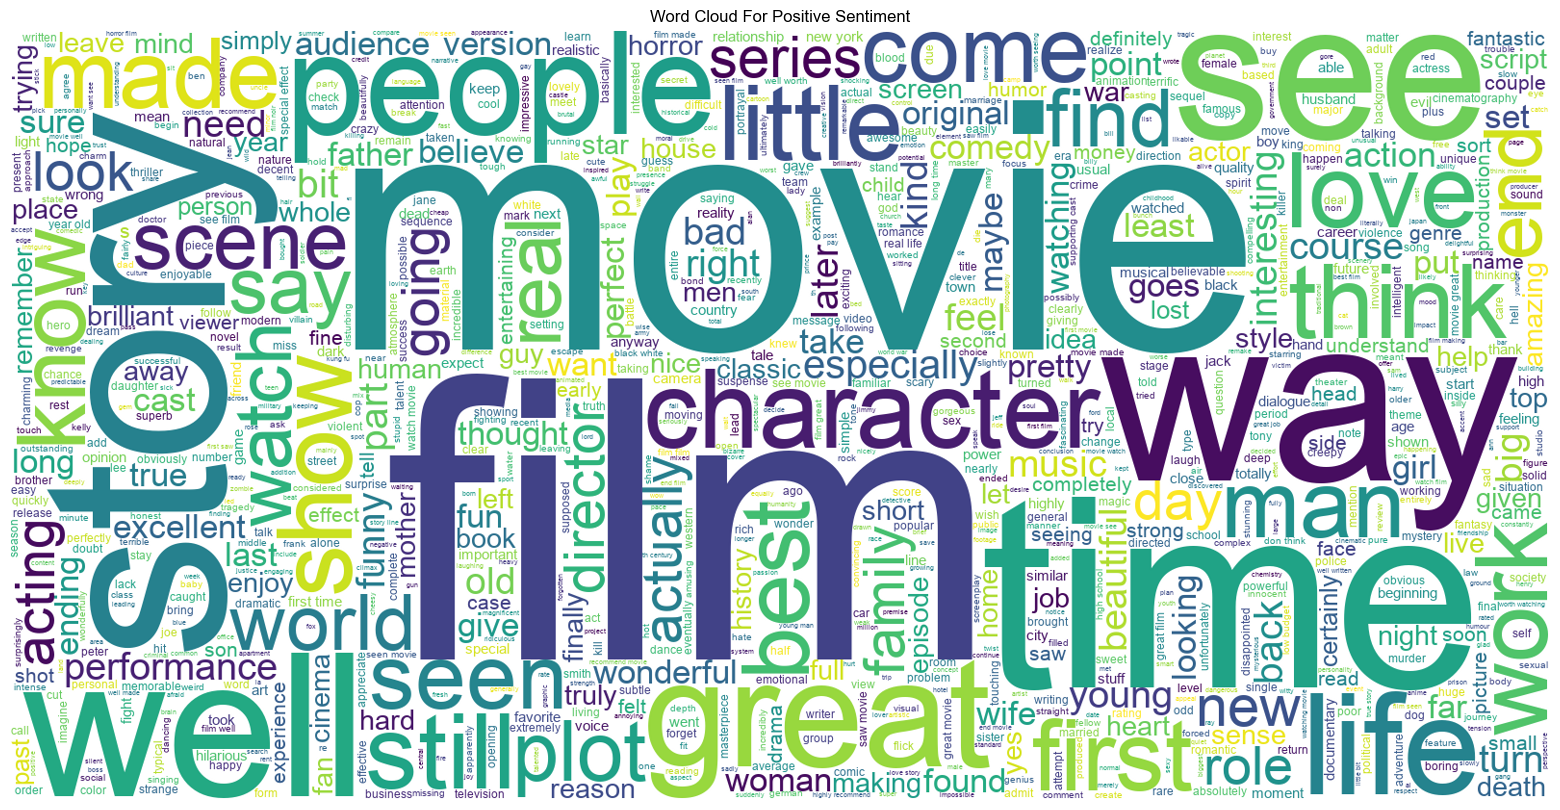

In [44]:
wordcloud(data=Train_data, target='Positive', width=1600, hieght=800, review='Normalized_Review', max_words= 1000)

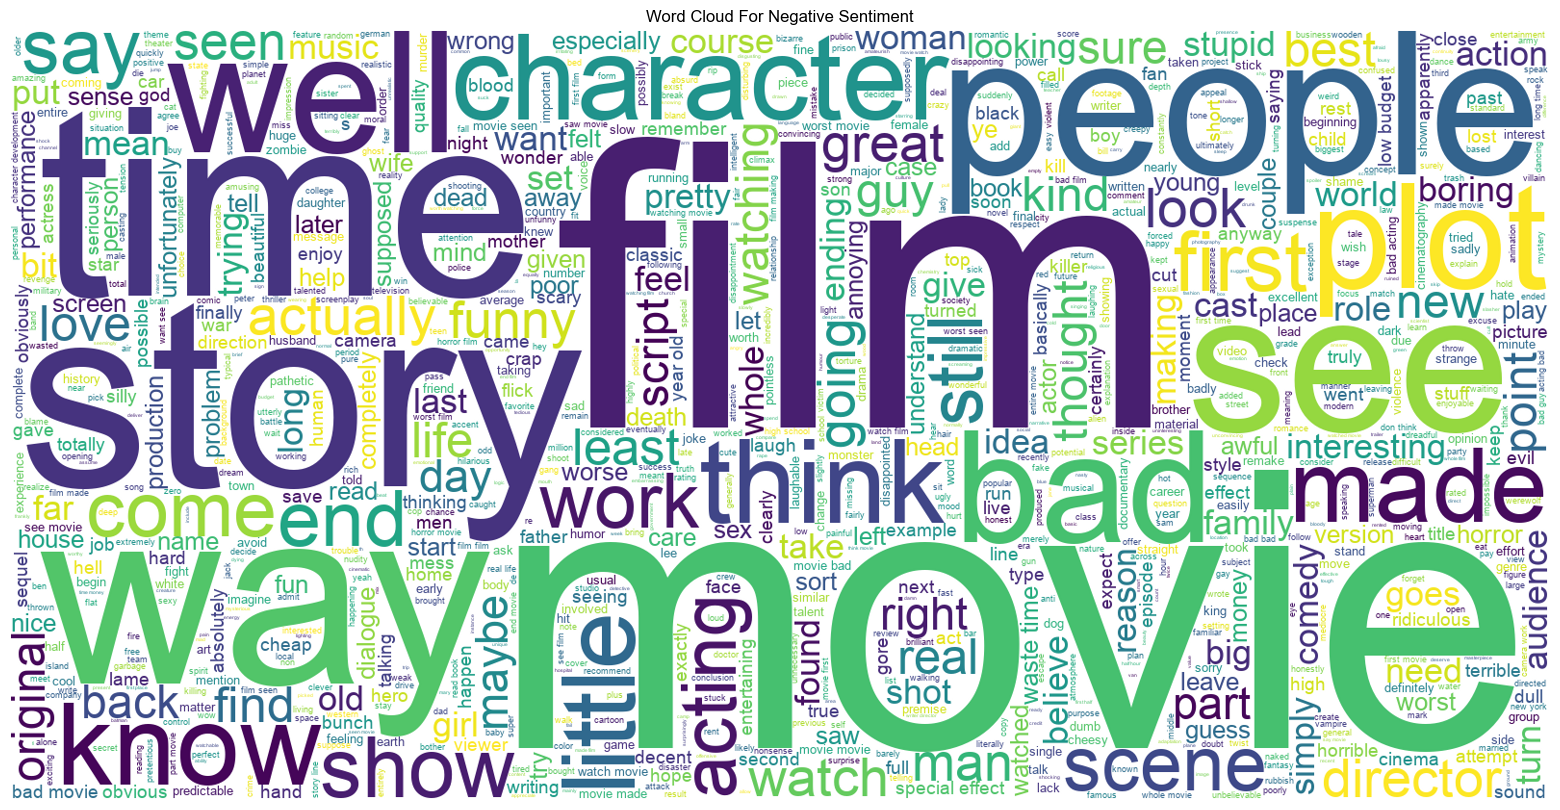

In [45]:
wordcloud(data=Train_data, target='Negative', width=1600, hieght=800, review='Normalized_Review', max_words= 1000)

**2-Test Data**

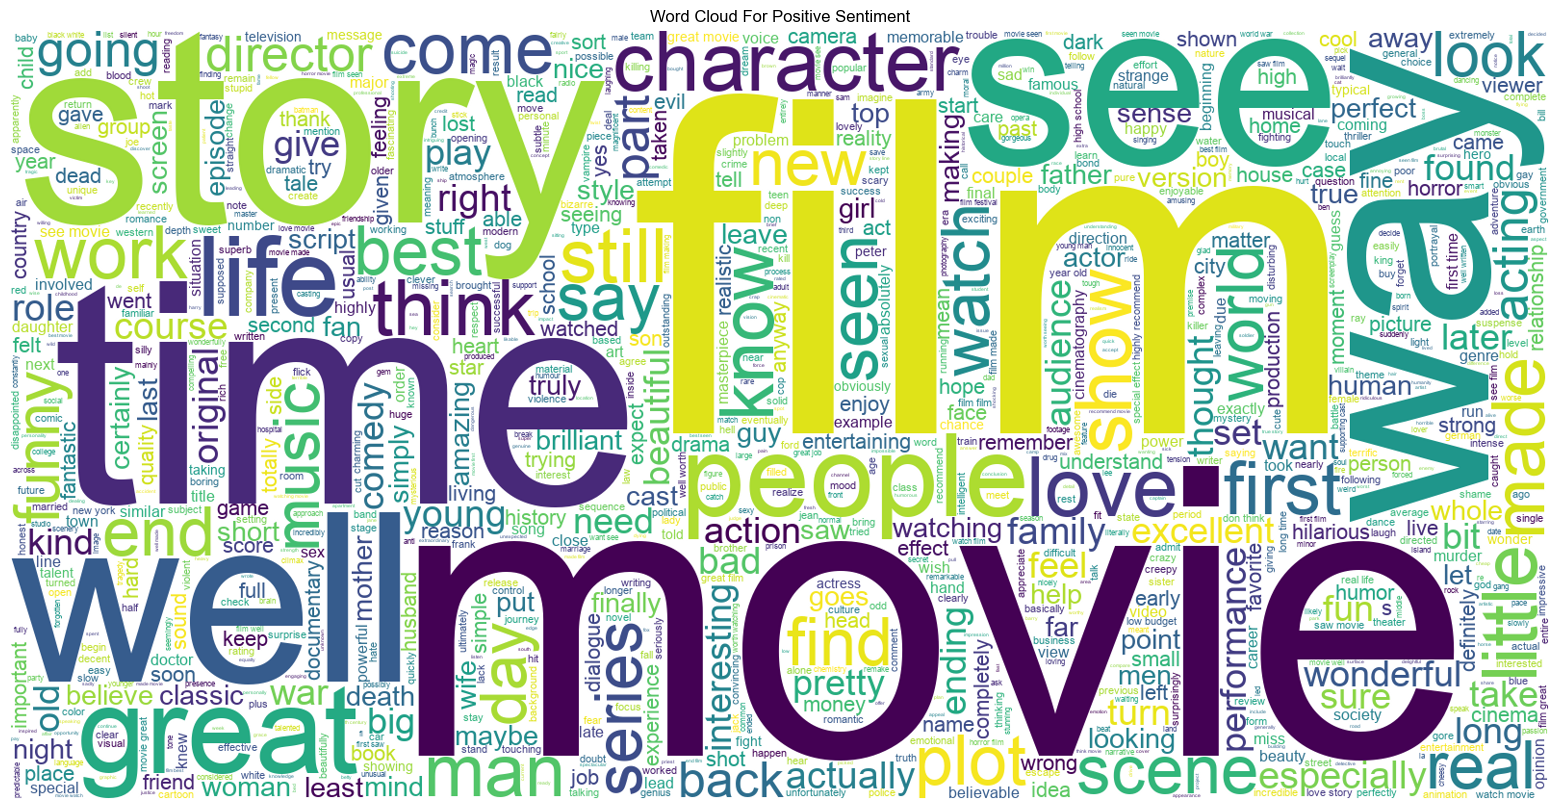

In [46]:
wordcloud(data=Test_data, target='Positive', width=1600, hieght=800, review='Normalized_Review', max_words= 1000)

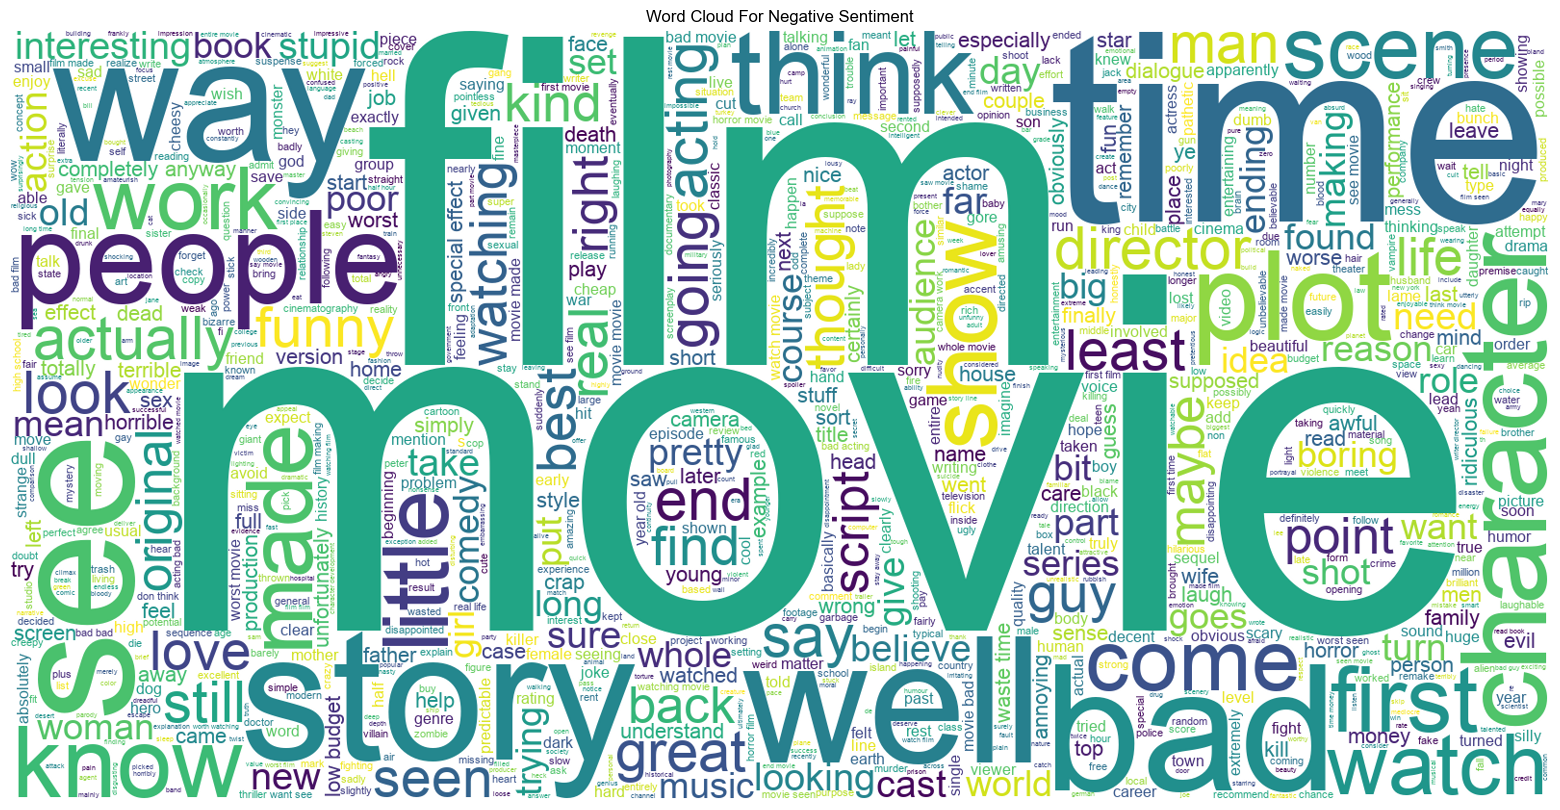

In [47]:
wordcloud(data=Test_data, target='Negative', width=1600, hieght=800, review='Normalized_Review', max_words= 1000)

# Number Of Words After Text Normalization

**1-Train Data**

In [48]:
Train_data["Number of Words 2"] = Train_data["Normalized_Review"].apply(lambda n:len(word_tokenize(n)))
Train_data.drop(Train_data[Train_data["Number of Words 2"] == 0].index, inplace = True)
Train_data["Number of Words 2"].sum()

1958263

**2-Test Data**

In [49]:
Test_data["Number of Words 2"] = Test_data["Normalized_Review"].apply(lambda n:len(word_tokenize(n)))
Test_data.drop(Test_data[Test_data["Number of Words 2"] == 0].index, inplace = True)
Test_data["Number of Words 2"].sum()

1912438

# Average Number Of Words After Text Normalization

**1-Train Data**

In [50]:
AverageNaumberOfWords2_Train_data = int(np.round((Train_data["Number of Words 2"].mean())))
AverageNaumberOfWords2_Train_data

78

**2-Test Data**

In [51]:
AverageNaumberOfWords2_Test_data = int(np.round((Test_data["Number of Words 2"].mean())))
AverageNaumberOfWords2_Test_data

76

# Maximum Number Of Word After Text Normalization

**1-Train Data**

In [52]:
MaximumNaumberOfWords2_Train_data = Train_data["Number of Words 2"].max()
MaximumNaumberOfWords2_Train_data

923

**2-Test Data**

In [53]:
MaximumNaumberOfWords2_Test_data = Test_data["Number of Words 2"].max()
MaximumNaumberOfWords2_Test_data

749

# Minimum Number Of Words After Text Normalization

**1-Train Data**

In [54]:
MimimumNaumberOfWords2_Train_data = Train_data["Number of Words 2"].min()
MimimumNaumberOfWords2_Train_data

2

**2-Test Data**

In [55]:
MimimumNaumberOfWords2_Test_data = Test_data["Number of Words 2"].min()
MimimumNaumberOfWords2_Test_data

3

# Number Of Charachters After Text Normalization

**1-Train Data**

In [56]:
Train_data["Number of Charachters 2"] = Train_data["Normalized_Review"].str.len()
Train_data["Number of Charachters 2"].sum()

13242392

**2-Test Data**

In [57]:
Test_data["Number of Charachters 2"] = Test_data["Normalized_Review"].str.len()
Test_data["Number of Charachters 2"].sum()

12918298

# Average Number Of Charachters After Text Normalization

**1-Train Data**

In [58]:
AverageNumberOfCharachters2_Train_data = int(np.round(Train_data["Number of Charachters 2"].mean()))
AverageNumberOfCharachters2_Train_data

530

**2-Test Data**

In [59]:
AverageNumberOfCharachters2_Test_data = int(np.round(Test_data["Number of Charachters 2"].mean()))
AverageNumberOfCharachters2_Test_data

517

# Maximum Number Of Charachters After Text Normalization

**1-Train Data**

In [60]:
MaximumNumberOfCharachters2_Train_data = Train_data['Number of Charachters 2'].max() 
MaximumNumberOfCharachters2_Train_data

5753

**2-Test Data**

In [61]:
MaximumNumberOfCharachters2_Test_data = Test_data['Number of Charachters 2'].max() 
MaximumNumberOfCharachters2_Test_data

5499

# Minimum Number Of Charachters After Text Normalization

**1-Train Data**

In [62]:
MinimumNumberOfCharachters2_Train_data = Train_data['Number of Charachters 2'].min() 
MinimumNumberOfCharachters2_Train_data

14

**2-Test Data**

In [63]:
MinimumNumberOfCharachters2_Test_data = Test_data['Number of Charachters 2'].min() 
MinimumNumberOfCharachters2_Test_data

15

# Most Frequent Words After Text Normalization

**1-Train Data**

In [64]:
MostFrequentWord2_Train_data = Counter((Train_data['Normalized_Review']).str.split().explode()).most_common(15)
MostFrequentWordDF2_Train_data = pd.DataFrame(MostFrequentWord2_Train_data, columns=('Word', 'Count'), index=range(1, 16))
MostFrequentWordDF2_Train_data

Word  Count
1       movie  44042
2        film  40161
3        like  20277
4        time  12725
5       story  11990
6         see  11482
7        well  10666
8      people   9296
9         bad   9281
10      first   9064
11      great   9058
12       made   8364
13        way   8077
14      think   7298
15  character   7024

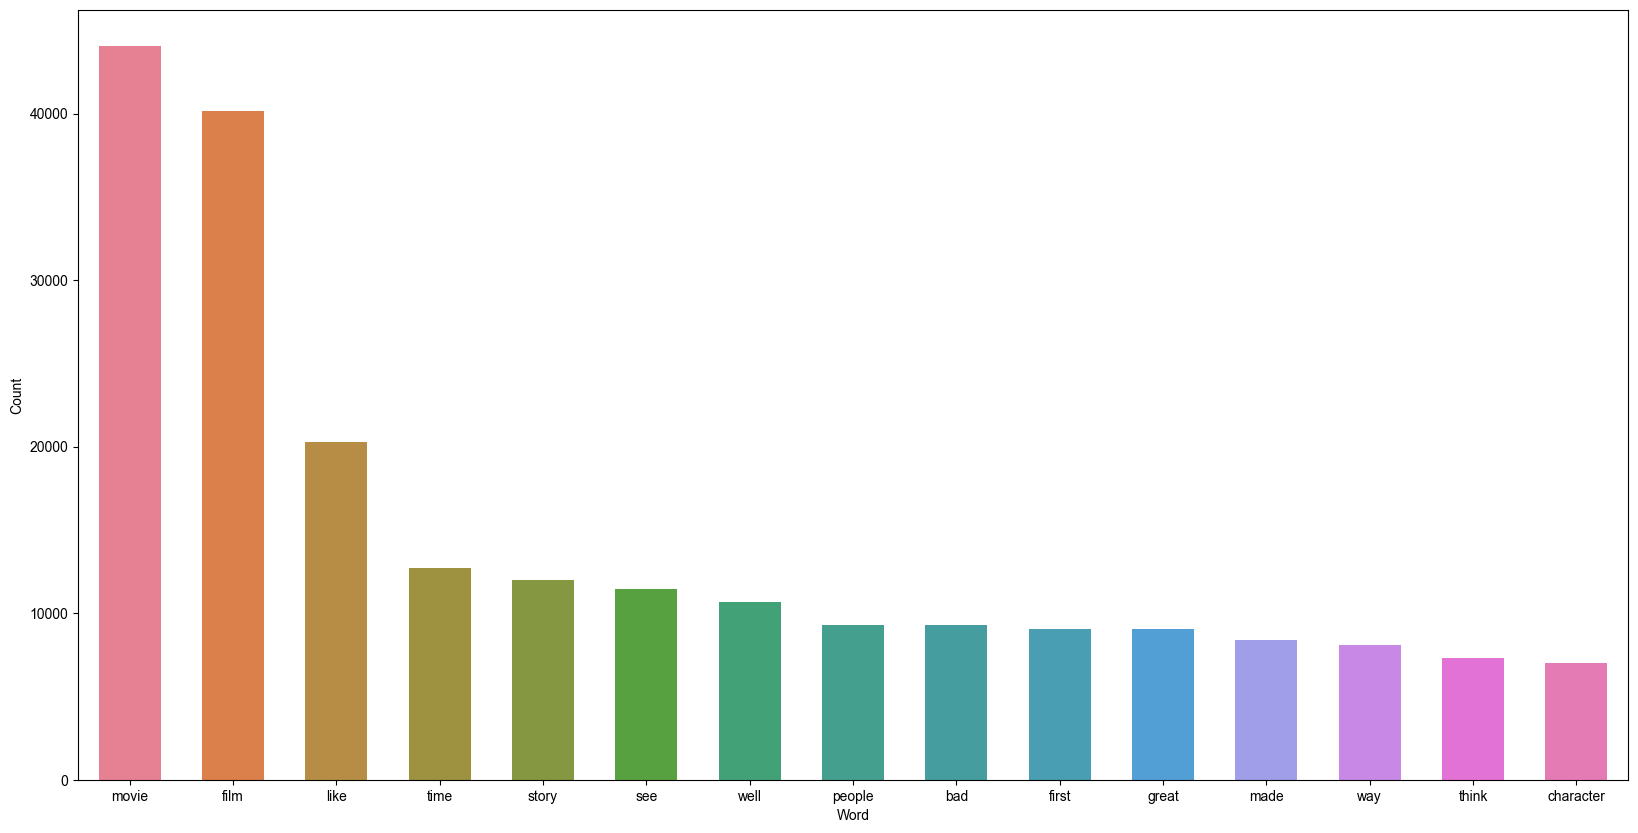

In [65]:
bar_plot(data=MostFrequentWordDF2_Train_data, x = 'Word', y='Count')

**2-Test Data**

In [66]:
MostFrequentWord2_Test_data = Counter((Test_data['Normalized_Review']).str.split().explode()).most_common(15)
MostFrequentWordDF2_Test_data = pd.DataFrame(MostFrequentWord2_Test_data, columns=('Word', 'Count'), index=range(1, 16))
MostFrequentWordDF2_Test_data

Word  Count
1    movie  43923
2     film  39541
3     like  19888
4     time  12383
5      see  11549
6    story  11131
7     well  10598
8      bad   9127
9    great   9076
10  people   8910
11   first   8519
12    made   7787
13     way   7682
14   think   7040
15   watch   6972

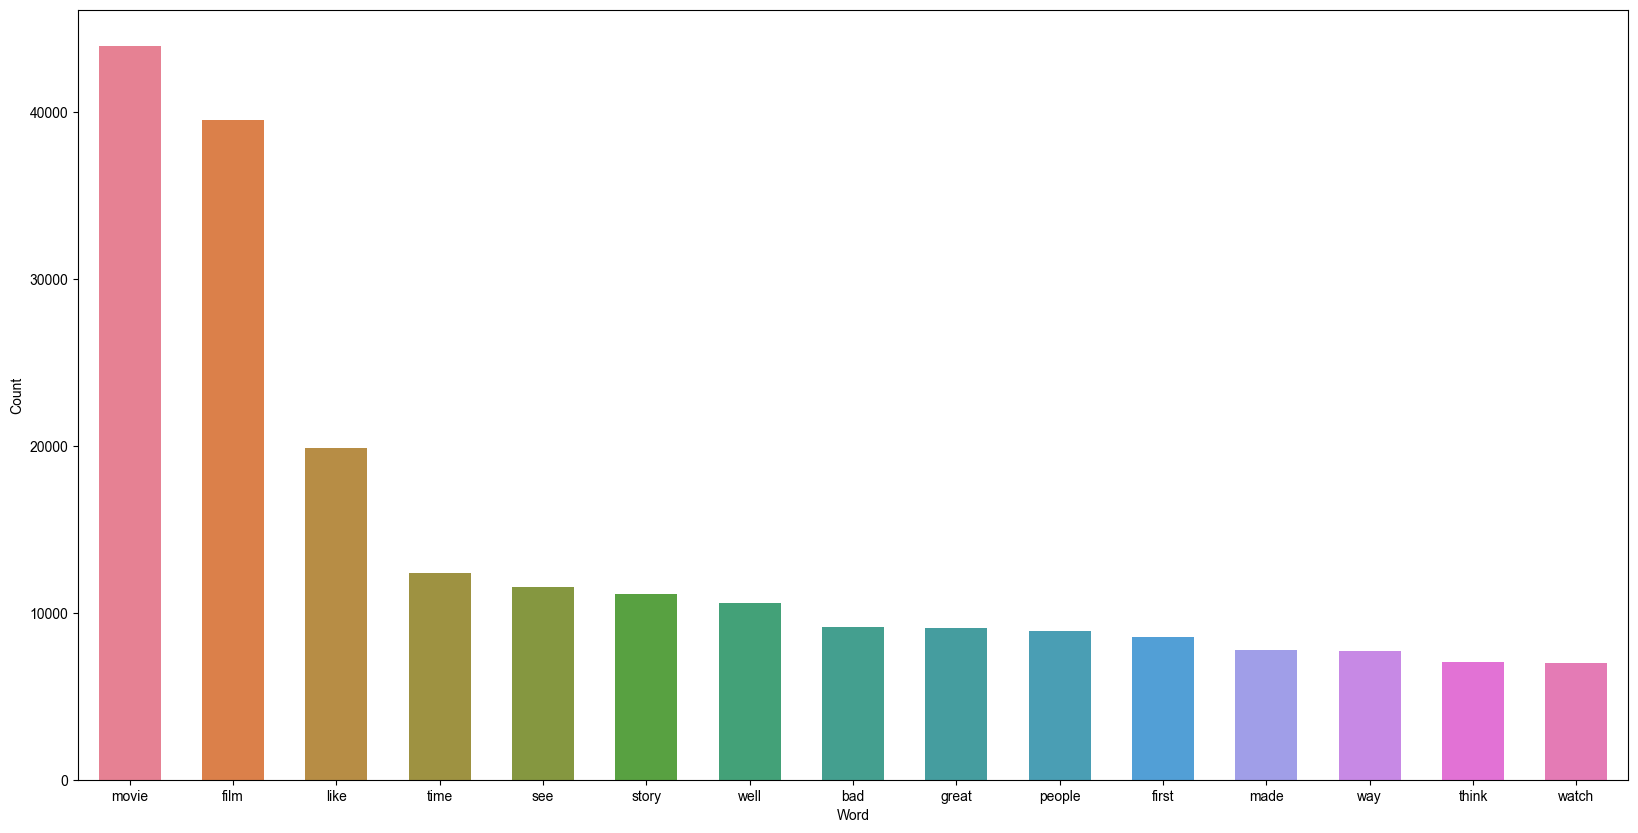

In [67]:
bar_plot(data=MostFrequentWordDF2_Test_data, x = 'Word', y='Count')

# Split The Dataset Into Training And Testing

In [68]:
X_train, X_test, y_train, y_test = Train_data['Normalized_Review'], Test_data['Normalized_Review'], Train_data['Sentiment'], Test_data['Sentiment']

# Encoding Dependent Variables (Y) Into Integer

In [69]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Vectorizer

In [70]:
Vectorizer = TfidfVectorizer()
X_train_Vec = Vectorizer.fit_transform(X_train)
X_test_Vec = Vectorizer.transform(X_test)

# Word Index

In [71]:
Word_index = Vectorizer.vocabulary_
Word_index_ =pd.DataFrame(sorted((list(Word_index.items()))), columns=['Word', 'Index'])
Word_index_.tail()

Word  Index
26503  zoologist  26503
26504    zoology  26504
26505       zoom  26505
26506      zorro  26506
26507   zucchini  26507

# Machine Learning

**1-Naive Bayes**

In [72]:
Algorithm = MultinomialNB(alpha= 1)
Naive_Bayes = machine_learning_model(algorithm=Algorithm)
fit_model(model=Naive_Bayes, X_train=X_train_Vec, y_train=y_train)

MultinomialNB(alpha=1)

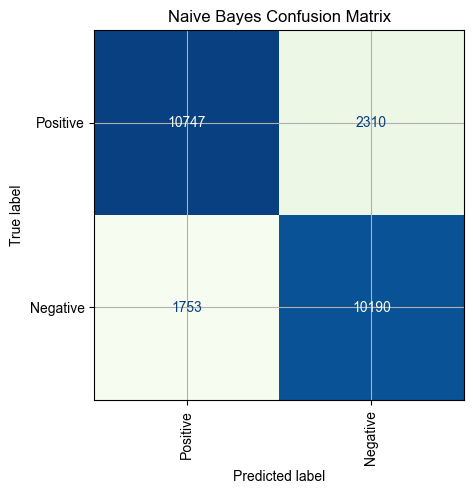

In [73]:
y_predNB = Naive_Bayes.predict(X_test_Vec)
ConfusionMatrixNB = confusion_matrix_(y_test = y_test, y_pred = y_predNB)
confusion_matrix_display(confusionmatrix = ConfusionMatrixNB, name = 'Naive Bayes')

In [74]:
False_PositiveNB, True_PositiveNB = false_true_positive(Confusin_Matrix = ConfusionMatrixNB)
False_NegativeNB, True_NegativeNB = false_true_negative(Confusin_Matrix = ConfusionMatrixNB)

In [75]:
AccuracyNB = accuracy_score(True_Positive = True_PositiveNB, True_Negative = True_NegativeNB, False_Positive =False_PositiveNB, False_Negative = False_NegativeNB)
PrecisionNB= precision_score(True_Positive = True_PositiveNB, False_Positive= False_PositiveNB)

SensitivityNB = sensitivity_score(True_Positive = True_PositiveNB,  False_Negative = False_NegativeNB)
SpecificityNB = specificity_score(True_Negative = True_NegativeNB, False_Positive = False_PositiveNB)

F1ScoreNB = f1_score(True_Positive = True_PositiveNB, False_Negative = False_NegativeNB, False_Positive = False_PositiveNB)
ErrorNB = error_rate(True_Positive = True_PositiveNB, True_Negative = True_NegativeNB, False_Positive =False_PositiveNB, False_Negative = False_NegativeNB)

In [76]:
performance_metrics_data_frame(Accuracy = AccuracyNB, Precision = PrecisionNB, Sensitivity = SensitivityNB, Specificity = SpecificityNB, F1Score = F1ScoreNB, Error = ErrorNB)

Values
Accuracy     0.837480
Precision    0.823083
Sensitivity  0.859760
Specificity  0.815200
F1Score      0.841022
Error        0.162520

**2-Logistic Regression**

In [77]:
Algorithm = LogisticRegression()
Logistic_Regression = machine_learning_model(algorithm=Algorithm)
fit_model(model=Logistic_Regression, X_train=X_train_Vec, y_train=y_train)


LogisticRegression()

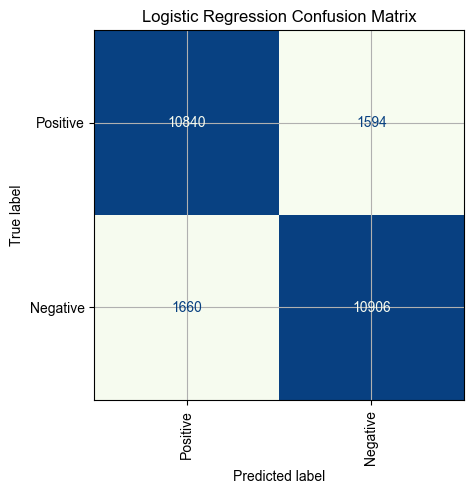

In [78]:
y_predLR = Logistic_Regression.predict(X_test_Vec)
ConfusionMatrixLR = confusion_matrix_(y_test = y_test, y_pred = y_predLR)
confusion_matrix_display(confusionmatrix = ConfusionMatrixLR, name = 'Logistic Regression')

In [79]:
False_PositiveLR, True_PositiveLR = false_true_positive(Confusin_Matrix = ConfusionMatrixLR)
False_NegativeLR, True_NegativeLR = false_true_negative(Confusin_Matrix = ConfusionMatrixLR)

In [80]:
AccuracyLR = accuracy_score(True_Positive = True_PositiveLR, True_Negative = True_NegativeLR, False_Positive =False_PositiveLR, False_Negative = False_NegativeLR)
PrecisionLR= precision_score(True_Positive = True_PositiveLR, False_Positive= False_PositiveLR)

SensitivityLR = sensitivity_score(True_Positive = True_PositiveLR,  False_Negative = False_NegativeLR)
SpecificityLR = specificity_score(True_Negative = True_NegativeLR, False_Positive = False_PositiveLR)

F1ScoreLR = f1_score(True_Positive = True_PositiveLR, False_Negative = False_NegativeLR, False_Positive = False_PositiveLR)
ErrorLR = error_rate(True_Positive = True_PositiveLR, True_Negative = True_NegativeLR, False_Positive =False_PositiveLR, False_Negative = False_NegativeLR)

In [81]:
performance_metrics_data_frame(Accuracy = AccuracyLR, Precision = PrecisionLR, Sensitivity = SensitivityLR, Specificity = SpecificityLR, F1Score = F1ScoreLR, Error = ErrorLR)

Values
Accuracy     0.869840
Precision    0.871803
Sensitivity  0.867200
Specificity  0.872480
F1Score      0.869495
Error        0.130160

**3-Decision Tree**

In [82]:
Algorithm = DecisionTreeClassifier(criterion='gini')
Decision_Tree = machine_learning_model(algorithm=Algorithm)
fit_model(model=Decision_Tree, X_train=X_train_Vec, y_train=y_train)

DecisionTreeClassifier()

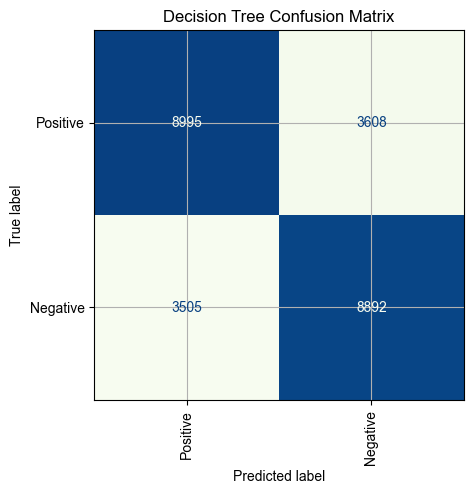

In [83]:
y_predDT = Decision_Tree.predict(X_test_Vec)
ConfusionMatrixDT = confusion_matrix_(y_test = y_test, y_pred = y_predDT)
confusion_matrix_display(confusionmatrix = ConfusionMatrixDT, name = 'Decision Tree')

In [84]:
False_PositiveDT, True_PositiveDT = false_true_positive(Confusin_Matrix = ConfusionMatrixDT)
False_NegativeDT, True_NegativeDT = false_true_negative(Confusin_Matrix = ConfusionMatrixDT)

In [85]:
AccuracyDT = accuracy_score(True_Positive = True_PositiveDT, True_Negative = True_NegativeDT, False_Positive =False_PositiveDT, False_Negative = False_NegativeDT)
PrecisionDT= precision_score(True_Positive = True_PositiveDT, False_Positive =False_PositiveDT)

SensitivityDT = sensitivity_score(True_Positive = True_PositiveDT,  False_Negative = False_NegativeDT)
SpecificityDT = specificity_score(True_Negative = True_NegativeDT, False_Positive = False_PositiveDT)

F1ScoreDT = f1_score(True_Positive = True_PositiveDT, False_Negative = False_NegativeDT, False_Positive = False_PositiveDT)
ErrorDT = error_rate(True_Positive = True_PositiveDT, True_Negative = True_NegativeDT, False_Positive =False_PositiveDT, False_Negative = False_NegativeDT)

In [86]:
performance_metrics_data_frame(Accuracy = AccuracyDT, Precision = PrecisionDT, Sensitivity = SensitivityDT, Specificity = SpecificityDT, F1Score = F1ScoreDT, Error = ErrorDT)

Values
Accuracy     0.715480
Precision    0.713719
Sensitivity  0.719600
Specificity  0.711360
F1Score      0.716647
Error        0.284520

**4-K Nearest Neighbors**

In [87]:
Algorithm =KNeighborsClassifier(metric='cosine', n_neighbors=5)
K_Nearest_Neighbors = machine_learning_model(algorithm=Algorithm)
fit_model(model=K_Nearest_Neighbors, X_train=X_train_Vec, y_train=y_train)

KNeighborsClassifier(metric='cosine')

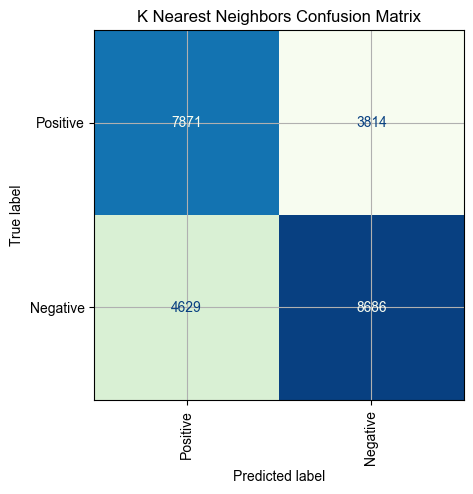

In [88]:
y_predKNN = K_Nearest_Neighbors.predict(X_test_Vec)
ConfusionMatrixKNN = confusion_matrix_(y_test = y_test, y_pred = y_predKNN)
confusion_matrix_display(confusionmatrix = ConfusionMatrixKNN, name = 'K Nearest Neighbors')

In [89]:
False_PositiveKNN, True_PositiveKNN = false_true_positive(Confusin_Matrix = ConfusionMatrixKNN)
False_NegativeKNN, True_NegativeKNN = false_true_negative(Confusin_Matrix = ConfusionMatrixKNN)

In [90]:
AccuracyKNN = accuracy_score(True_Positive = True_PositiveKNN, True_Negative = True_NegativeKNN, False_Positive =False_PositiveKNN, False_Negative = False_NegativeKNN)
PrecisionKNN= precision_score(True_Positive = True_PositiveKNN, False_Positive =False_PositiveKNN)

SensitivityKNN = sensitivity_score(True_Positive = True_PositiveKNN,  False_Negative = False_NegativeKNN)
SpecificityKNN = specificity_score(True_Negative = True_NegativeKNN, False_Positive = False_PositiveKNN)

F1ScoreKNN = f1_score(True_Positive = True_PositiveKNN, False_Negative = False_NegativeKNN, False_Positive = False_PositiveKNN)
ErrorKNN = error_rate(True_Positive = True_PositiveKNN, True_Negative = True_NegativeKNN, False_Positive =False_PositiveKNN, False_Negative = False_NegativeKNN)

In [91]:
performance_metrics_data_frame(Accuracy = AccuracyKNN, Precision = PrecisionKNN, Sensitivity = SensitivityKNN, Specificity = SpecificityKNN, F1Score = F1ScoreKNN, Error = ErrorKNN)

Values
Accuracy     0.662280
Precision    0.673599
Sensitivity  0.629680
Specificity  0.694880
F1Score      0.650899
Error        0.337720

**5-Random Forest**

In [92]:
Algorithm = RandomForestClassifier(criterion = 'entropy', n_estimators=100)
Random_Forest = machine_learning_model(algorithm=Algorithm)
fit_model(model=Random_Forest, X_train=X_train_Vec, y_train=y_train)

RandomForestClassifier(criterion='entropy')

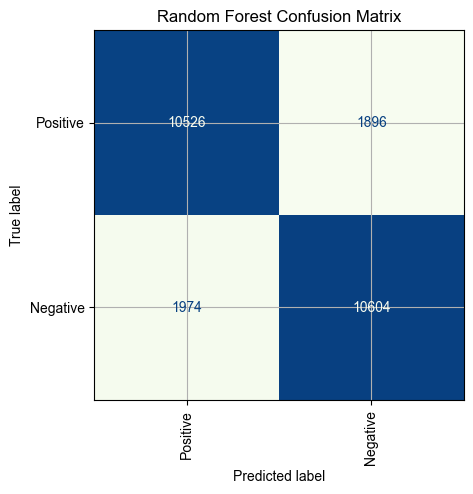

In [93]:
y_predRF = Random_Forest.predict(X_test_Vec)
ConfusionMatrixRF = confusion_matrix_(y_test = y_test, y_pred = y_predRF)
confusion_matrix_display(confusionmatrix = ConfusionMatrixRF, name = 'Random Forest')

In [94]:
False_PositiveRF, True_PositiveRF = false_true_positive(Confusin_Matrix = ConfusionMatrixRF)
False_NegativeRF, True_NegativeRF = false_true_negative(Confusin_Matrix = ConfusionMatrixRF)

In [95]:
AccuracyRF = accuracy_score(True_Positive = True_PositiveRF, True_Negative = True_NegativeRF, False_Positive =False_PositiveRF, False_Negative = False_NegativeRF)
PrecisionRF= precision_score(True_Positive = True_PositiveRF, False_Positive =False_PositiveRF)

SensitivityRF = sensitivity_score(True_Positive = True_PositiveRF,  False_Negative = False_NegativeRF)
SpecificityRF = specificity_score(True_Negative = True_NegativeRF, False_Positive = False_PositiveRF)

F1ScoreRF = f1_score(True_Positive = True_PositiveRF, False_Negative = False_NegativeRF, False_Positive = False_PositiveRF)
ErrorRF = error_rate(True_Positive = True_PositiveRF, True_Negative = True_NegativeRF, False_Positive =False_PositiveRF, False_Negative = False_NegativeRF)

In [96]:
performance_metrics_data_frame(Accuracy = AccuracyRF, Precision = PrecisionRF, Sensitivity = SensitivityRF, Specificity = SpecificityRF, F1Score = F1ScoreRF, Error = ErrorRF)

Values
Accuracy     0.845200
Precision    0.847368
Sensitivity  0.842080
Specificity  0.848320
F1Score      0.844716
Error        0.154800

**6-SGD Classifier**

In [97]:
Algorithm = SGDClassifier(loss='hinge')
SGD = machine_learning_model(algorithm=Algorithm)
fit_model(model=SGD, X_train=X_train_Vec, y_train=y_train)

SGDClassifier()

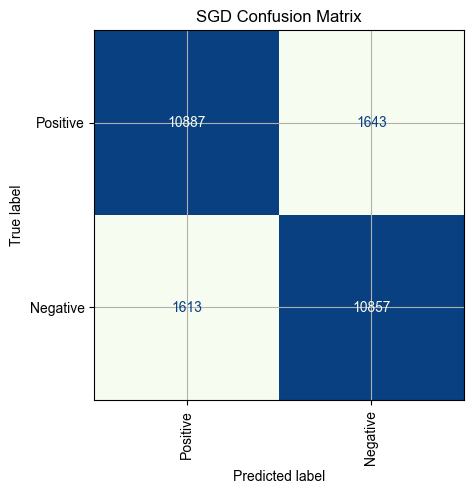

In [98]:
y_predSGD = SGD.predict(X_test_Vec)
ConfusionMatrixSGD = confusion_matrix_(y_test = y_test, y_pred = y_predSGD)
confusion_matrix_display(confusionmatrix = ConfusionMatrixSGD, name = 'SGD')

In [99]:
False_PositiveSGD, True_PositiveSGD = false_true_positive(Confusin_Matrix = ConfusionMatrixSGD)
False_NegativeSGD, True_NegativeSGD = false_true_negative(Confusin_Matrix = ConfusionMatrixSGD)

In [100]:
AccuracySGD = accuracy_score(True_Positive = True_PositiveSGD, True_Negative = True_NegativeSGD, False_Positive =False_PositiveSGD, False_Negative = False_NegativeSGD)
PrecisionSGD= precision_score(True_Positive = True_PositiveSGD, False_Positive =False_PositiveSGD)

SensitivitySGD = sensitivity_score(True_Positive = True_PositiveSGD,  False_Negative = False_NegativeSGD)
SpecificitySGD = specificity_score(True_Negative = True_NegativeSGD, False_Positive = False_PositiveSGD)

F1ScoreSGD = f1_score(True_Positive = True_PositiveSGD, False_Negative = False_NegativeSGD, False_Positive = False_PositiveSGD)
ErrorSGD = error_rate(True_Positive = True_PositiveSGD, True_Negative = True_NegativeSGD, False_Positive =False_PositiveSGD, False_Negative = False_NegativeSGD)

In [101]:
performance_metrics_data_frame(Accuracy = AccuracySGD, Precision = PrecisionSGD, Sensitivity = SensitivitySGD, Specificity = SpecificitySGD, F1Score = F1ScoreSGD, Error = ErrorSGD)

Values
Accuracy     0.869760
Precision    0.868875
Sensitivity  0.870960
Specificity  0.868560
F1Score      0.869916
Error        0.130240

# Build Word2Vec

In [102]:
# word_2_vec_(data = Data['Text'], vector_size=100, sg = 1, name = 'EnglishWord2Vec100D')

# Deep Learning

In [103]:
tokenizer, vocab_size, max_length, encoded_X_train , encoded_X_test = deeplearning_preprcosesing_(X_train=X_train, X_test=X_test,  truncating='pre', padding='pre')
embedding_dim = 100

In [104]:
print('The Vocab Size Is :',vocab_size)
print('')
print('The Max Length Is :', max_length)

The Vocab Size Is : 26533

The Max Length Is : 923


In [105]:
Arabic_Word_2_Vec_100D = './EnglishWord2Vec100D.txt'
embedding_dic = {}
with open(Arabic_Word_2_Vec_100D) as f:
    for line in f:
        values = line.split()
        word = values[0]
        x = np.asarray(values[1:], dtype='float32')
        embedding_dic[word] = x

In [106]:
embedding_matrix = np.zeros((vocab_size+1, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embedding_dic.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [107]:
Callback = tf.keras.callbacks.EarlyStopping(
                    monitor="accuracy",
                    mode="max",
                    patience=3
                )

**7-LSTM**

Epoch 1/15
391/391 [==============================] - 74s 184ms/step - loss: 0.5681 - accuracy: 0.6886 - val_loss: 0.4183 - val_accuracy: 0.8199
Epoch 2/15
391/391 [==============================] - 75s 191ms/step - loss: 0.3920 - accuracy: 0.8322 - val_loss: 0.3697 - val_accuracy: 0.8396
Epoch 3/15
391/391 [==============================] - 72s 185ms/step - loss: 0.3495 - accuracy: 0.8554 - val_loss: 0.3449 - val_accuracy: 0.8508
Epoch 4/15
391/391 [==============================] - 73s 187ms/step - loss: 0.3200 - accuracy: 0.8685 - val_loss: 0.3333 - val_accuracy: 0.8557
Epoch 5/15
391/391 [==============================] - 75s 192ms/step - loss: 0.2993 - accuracy: 0.8798 - val_loss: 0.3288 - val_accuracy: 0.8589
Epoch 6/15
391/391 [==============================] - 79s 203ms/step - loss: 0.2796 - accuracy: 0.8900 - val_loss: 0.3377 - val_accuracy: 0.8541
Epoch 7/15
391/391 [==============================] - 74s 188ms/step - loss: 0.2620 - accuracy: 0.8990 - val_loss: 0.3247 - val_ac

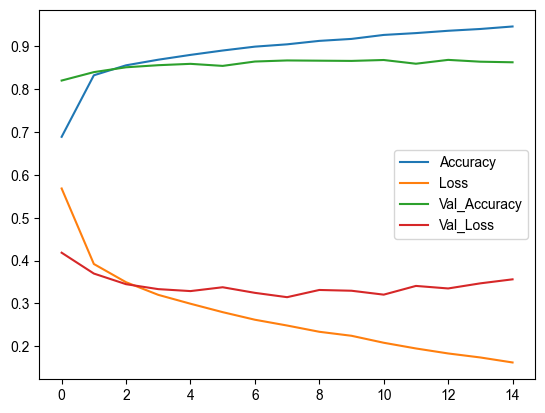

In [108]:
LSTM =lstm_(vocab_size= vocab_size + 1, embedding_dim= embedding_dim, max_length= max_length, dropout=0.3, units1=64, embeddings_matrix = embedding_matrix, units2= 10)
model_compile(model=LSTM)
history = model_fit(model=LSTM, X_train=encoded_X_train, y_train=y_train, epochs=15, X_test=encoded_X_test, y_test=y_test, batch_size=64, Callback=Callback)
plot_changes(histoty=history)  

**8-GRU**

Epoch 1/15
782/782 [==============================] - 99s 123ms/step - loss: 0.6703 - accuracy: 0.5823 - val_loss: 0.6184 - val_accuracy: 0.6833
Epoch 2/15
782/782 [==============================] - 100s 128ms/step - loss: 0.4655 - accuracy: 0.7830 - val_loss: 0.3671 - val_accuracy: 0.8396
Epoch 3/15
782/782 [==============================] - 106s 135ms/step - loss: 0.3467 - accuracy: 0.8559 - val_loss: 0.3363 - val_accuracy: 0.8560
Epoch 4/15
782/782 [==============================] - 108s 138ms/step - loss: 0.3100 - accuracy: 0.8751 - val_loss: 0.3270 - val_accuracy: 0.8610
Epoch 5/15
782/782 [==============================] - 142s 181ms/step - loss: 0.2843 - accuracy: 0.8882 - val_loss: 0.3138 - val_accuracy: 0.8678
Epoch 6/15
782/782 [==============================] - 142s 182ms/step - loss: 0.2625 - accuracy: 0.9007 - val_loss: 0.3165 - val_accuracy: 0.8670
Epoch 7/15
782/782 [==============================] - 123s 157ms/step - loss: 0.2450 - accuracy: 0.9098 - val_loss: 0.3209 - 

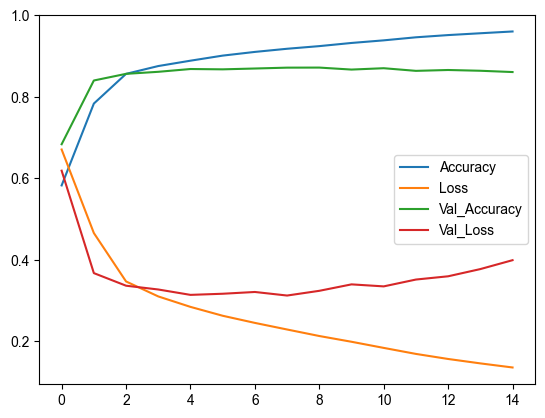

In [109]:
GRU_=gru_(vocab_size= vocab_size + 1, embedding_dim= embedding_dim, max_length= max_length, dropout=0.3, units1=32, embeddings_matrix = embedding_matrix, units2 = 32)
model_compile(model=GRU_)
history = model_fit(model=GRU_, X_train=encoded_X_train, y_train=y_train, epochs=15, X_test=encoded_X_test, y_test=y_test, batch_size=32, Callback=Callback)
plot_changes(histoty=history)

**9-Bidirectional LSTM** 

Epoch 1/15
782/782 [==============================] - 337s 418ms/step - loss: 0.5200 - accuracy: 0.7307 - val_loss: 0.3857 - val_accuracy: 0.8319
Epoch 2/15
782/782 [==============================] - 317s 405ms/step - loss: 0.3564 - accuracy: 0.8515 - val_loss: 0.3450 - val_accuracy: 0.8530
Epoch 3/15
782/782 [==============================] - 303s 387ms/step - loss: 0.3179 - accuracy: 0.8693 - val_loss: 0.3296 - val_accuracy: 0.8599
Epoch 4/15
782/782 [==============================] - 334s 428ms/step - loss: 0.2919 - accuracy: 0.8821 - val_loss: 0.3145 - val_accuracy: 0.8660
Epoch 5/15
782/782 [==============================] - 343s 438ms/step - loss: 0.2676 - accuracy: 0.8935 - val_loss: 0.3138 - val_accuracy: 0.8680
Epoch 6/15
782/782 [==============================] - 360s 460ms/step - loss: 0.2490 - accuracy: 0.9047 - val_loss: 0.3133 - val_accuracy: 0.8660
Epoch 7/15
782/782 [==============================] - 411s 525ms/step - loss: 0.2315 - accuracy: 0.9129 - val_loss: 0.3173 -

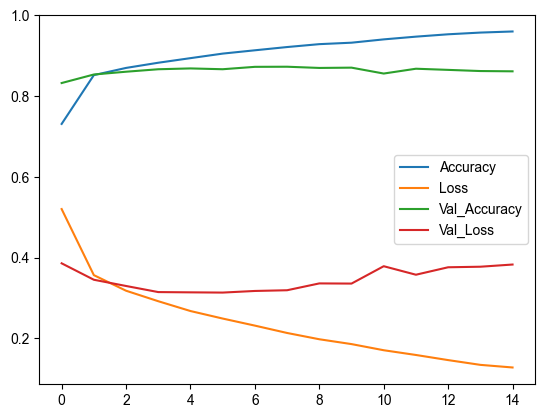

In [110]:
Bidirectional_LSTM=bidirectional_lstm(vocab_size= vocab_size + 1, embedding_dim= embedding_dim, max_length= max_length, dropout=0.5, units1=64, embeddings_matrix = embedding_matrix, units2 = 10)
model_compile(model=Bidirectional_LSTM)
history = model_fit(model=Bidirectional_LSTM, X_train=encoded_X_train, y_train=y_train, epochs=15, X_test=encoded_X_test, y_test=y_test, batch_size=32, Callback=Callback)
plot_changes(histoty=history) 